<div style="text-align: center; margin: 50px">

<h1 style="text-align: center;">Qubit by Qubit - Semester 2</h1>
<h3>Week 22 - Randomized Benchmarking</h3>

</div>

Lab overview:
1. [Introduction](#intro) <br>
2. [Steps for Randomized Benchmarking](#steps) <br>
    2.1 [Create Noise Model](#step2.1) <br>
    2.2 [Create Randomized Circuit](#step2.2) <br>
    2.3 [Run randomized circuits using noise model](#step2.3) <br>
    2.4 [Compare results](#step2.4)<br>
    2.5 [Discussion points](#discusion)<br>
3. [Challenge problems](#challenge)<br>
4. [Extra content (strictly optional!!)](#extra)<br>

<a id="intro"></a>
# 1. Introduction

Randomized benchmarking is the process of measuring gate fidelities for different quantum computing systems by testing out the same circuits on them. *Randomized* refers to the fact that the circuits are generated randomly from a collection of gates. *Benchmarking* means that we use the results of this process to compare the performance of different systems against each other.

In this lab, we will perform a simplified version of randomized benchmarking to compare the performances of two QCs - ibmq_5_yorktown and ibmq_belem.

First, let us import the usual qiskit libraries.

In [ ]:
from qiskit import QuantumCircuit, execute
from qiskit import IBMQ, Aer
from qiskit.visualization import plot_histogram
import numpy as np
provider = IBMQ.load_account()

Next, let us import the `NoiseModel` libray, and the `ranomized_benchmarking` library. We will use the `NoiseModel` library to create noise models that mimic actual IBM QCs, and the `randomized_benchmarking` library to generate random circuits to test out gate fidelities.

Also, we will import `matplotlit.pyplot` to create plots of the performance of the two QCs we will compare.

In [ ]:
from qiskit.providers.aer.noise import NoiseModel
import qiskit.ignis.verification.randomized_benchmarking as rb
import matplotlib.pyplot as plt

<a id="steps"></a>
# 2. Steps in randomized benchmarking

Next, we will implement RB step-by-step.

<a id="step2.1"></a>
## 2.1 Create noise models
The first step is creating a noise model to mimic the QCs we want to compare.

In [ ]:
# Build noise model from backend properties. We want to compare belem and yorktown.
backend_belem = provider.get_backend('ibmq_belem')
noise_model_belem = NoiseModel.from_backend(backend_belem)

backend_yorktown = provider.get_backend('ibmq_5_yorktown')
noise_model_yorktown = #Insert code to create a NoiseModel from ibmq_5_yorktown

<a id="step2.2"></a>
## 2.2 Create randomized circuits

The next step is creating the randomized circuits. Here, we will first specify an array called `lengths` to store gate lengths, and another array called `pattern` to store the number and pattern of qubits. Here, we will test 2 qubit circuits with lengths varying from 1 to 200.

In [ ]:
 #Number of gates in the sequence
# Insert code to create a list with elements 1, 5, 10, 20, 50, 75, 100, 125, 150, 175, 200
lengths = [1, 5, 10, 20, 50, 75, 100, 125, 150, 175, 200] 
# Insert code to create a list of 3 qubits 0, 1, and 2
pattern = [[0,1,2]]

rb_circs, _ = rb.randomized_benchmarking_seq(length_vector =, rb_pattern = ) #Fill in the parameters for length and pattern

Let's see what the circuits look like! The function `rb.randomized_benchmarking_seq` creates a 2-D vector which we've named `rb_circs`, so we will need two indices to refer to a particular circuit. The reason this is a 2-D vector is because `rb.randomized_benchmarking_seq` provides an option called `nseeds` to create many circuits of the same length, for different lengths. We will not use this option in this lab, but you can see it being used in the qiskit textbook page on RB.

The function also gives back a list containing the lengths of the different circuits, which we've stored in the variable `xdata`.

Let's draw some of these circuits to see what they look like.

In [ ]:
rb_circs[0][0].draw('mpl')  # Draw the circuit with length 1, 5, 10, etc.

<a id="step2.3"></a>
## 2.3 Run randomized circuits using noise models
Next, let's run these circuits. We will run each of the 11 circuits we generated one-by-one, using both the belem and yorktown noise models. We'll use a loop to simplify the code.

In [ ]:
count_000_belem = np.zeros(11) # Array will store the counts of 000 for belem 
count_000_yorktown = np.zeros(11)  # Array will store the counts of 000 for yorktown
backend = Aer.get_backend('qasm_simulator')
sh = 1024*256
for i in range(11):
    #getting results using the belem noise model
    job_belem = execute(rb_circs[0][i], backend, noise_model=noise_model_belem, shots = sh)
    results_belem = # Fill in code to get results
    counts_belem = #Fill in code to get counts from results
    count_000_belem[i] = counts_belem["000"] #extracting the 000 counts from belem results
    
    #getting results using the yorktown noise model
    job_yorktown = #
    results_yorktown = # Fill in code to get results
    counts_yorktown = #Fill in code to get counts from results
    count_000_yorktown[i] = counts_yorktown["000"] #extracting the 000 counts from yorktown results
    
    print("Finished running circuit",str(i+1),"out of 11 on using both noise models.") # Keep track of progress

<a id="step2.4"></a>
## 2.4 Compare results
Finally, we can plot the results! We will use the library `matplotlib.pyplot` that we had imported earlier. This library provides the function `plot`, which we will use to create plots of the performance of the two simulated QCs.

We will plot the counts of 00 for each of the two processors - belem and yorktown, vs the length of the circuit for each count. This plot will show us the how likely we are to get the right result (00) as the length of the circuit increases.

In [ ]:
plt.plot(lengths, count_000_belem/sh, marker = 's')    #Normalized counts by number of shots to get probabilities
plt.plot(lengths, count_000_yorktown/sh, marker = 'o')
plt.legend(['belem','yorktown'])
plt.xlabel('length of circuit')
plt.ylabel('probability of getting 000')

What do you notice?

What do you think? Which QC produces more accurate results - belem or yorktown? Can you relate this to their gate error probabilities?

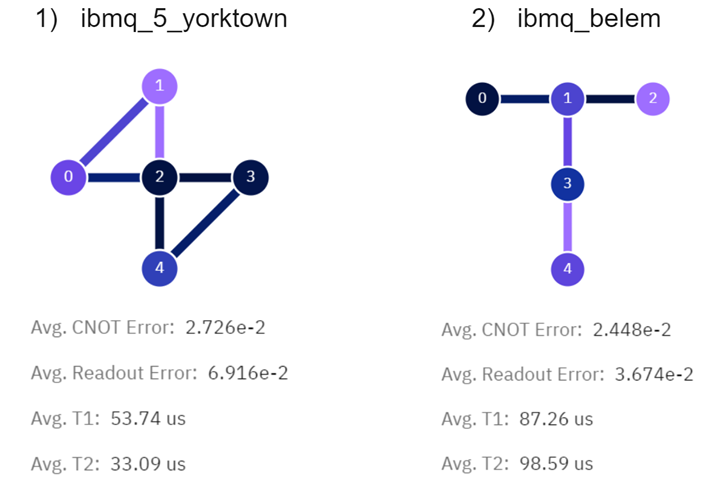

<a id="discussion"></a>
## 2.5 Discussion

**Gate fidelity**: From the slope of these graphs, we can extract average gate fidelity, which is the average probability that a gate produces the right result. What do you think - which circuit has higher gate fidelity?

**Connectivity** : In which computer (yorktwon or belem) is it easier to apply a gate between qubit 2 and qubit 4? What implications does this have for error rates?

<a id="challenge"></a>
# 3. Challenge problems

**Problem 1:** Using only Yorktown and Belem, try using the noise models to simulate the circuit in question 5 of the homework on each of these computers (as we did in lab). Which computer has a better error?

**Problem 2:** Test out randomized benchmarking by using noise models from other quantum computers - try out ibmq_lima, ibmq_rome, etc. How do these systems compare to belem and yorktown? Feel free to post your results on Piazza!

**Problem 3:** Test out the randomized bechmarking circuit with 4 and 5 qubits. How do the results differ from the 3 qubit case?

**Problem 4:** Test out a small (length =1 or 5) benchmarking circuit with 3 qubits on an actual quantum computer. Are the results similar to the noisy simulation we did here?

<a id="extra content"></a>
# 4. Extra content (strictly optional!!) - Qiskit Pulse

# Overview 
1. [Introduction](#introduction)
2. [Calibrating and using a $\pi$ Pulse](#pipulse)
    1. [Backen with Pulse Support](#pulsebackend)
    2. [Qubit Frequency](#frequency)
    3. [Using the $\pi$ Pulse](#usepipulse)
        1. [Determining 0 vs 1](#determining)

<a id="introduction"></a>
# Introduction

[Qiskit Pulse](https://qiskit.org/documentation/apidoc/pulse.html) is a pulse-level quantum programming kit. This lower level of programming offers the user more control than programming with `QuantumCircuit`s.

Qiskit Pulse provides a language for specifying pulse level control (i.e. control of the continuous time dynamics of input signals) of a general quantum device independent of the specific hardware implementation. With Qiskit Pulse, we have unprecedented control over the waveforms used to control quantum computers, including architectures other than superconducting qubits, to study and mitigate noise in these devices.

Quantum computers are noisy devices. Even the best superconducting quantum bits forget their quantum information in less than a millisecond due to noise from interactions with the outside world. Much of today’s hardware research focuses on how to mitigate the computing errors caused by this noise as we pursue [large-scale, fault-tolerant devices](https://www.ibm.com/blogs/research/2020/09/ibm-quantum-roadmap/).

Noise isn’t always random — some sources of noise exhibit patterns caused by their underlying source, such as drift in the hardware or ambient fields. Pulse-level control offers a way to handle these less-random noise sources.

To review this topic, let's see how to implement typical single-qubit calibration and characterization experiments using Qiskit and Qiskit Pulse. It should be noted that all units are returned as standard [SI](https://en.wikipedia.org/wiki/International_System_of_Units) (ie Hz, sec, etc).

Each experiment gives us more information about the system, which is typically used in subsequent experiments. For this reason, this notebook has to be mostly executed in order.

<a id="pipulse"></a>
# Calibrating and using a $\pi$ Pulse

A $\pi$ pulse helps us bring the state $|0\rangle$ to state $|1\rangle$ and vice versa, as can be seen in the following Bloch sphere:

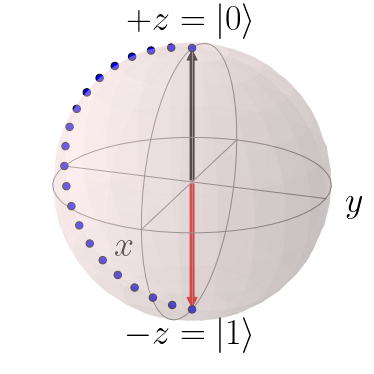

This is the bit-flip operator, or $X$ gate that we have already used before. Now we will do the state change with a $NOT$ operation, but instead of directly applying the $X$ gate, we will apply a $\pi$ pulse.

But first we must know the device in which we will execute these pulses, so we must choose one and find out its frequency, in such a way that we can use this information to generate the pulse we want.

<a id="pulsebackend"></a>
## Backend with Pulse Support

We'll first get our basic dependencies set up and ready to go. Since we want to use real, noisy devices for our calibration experiments in this notebook, we need to load our IBMQ account and set the appropriate backend.

In [ ]:
from qiskit.tools.jupyter import *

In [ ]:
from qiskit import IBMQ
IBMQ.load_account()
provider = IBMQ.get_provider(hub='ibm-q', group='open', project='main')
backend = provider.get_backend('ibmq_armonk')

We verify that the backend supports Pulse features by checking the backend configuration. The config provides us with general information about the structure of the backend setup. To know more details about the backend you can check the [Qiskit documentation](https://qiskit.org/documentation/tutorials/circuits_advanced/08_gathering_system_information.html).

In [ ]:
backend_config = backend.configuration()

if backend_config.open_pulse is False:
    print("Backend doesn't support Pulse")


For instance, we can find the sampling time for the backend pulses within the backend configuration. This will be a very useful value to us as we build and execute our calibration routines.

In [ ]:
dt = backend_config.dt
print(dt)

print(f"Sampling time: {dt*1e9} ns")    # The configuration returns dt in seconds, so multiply by
                                        # 1e9 to get nanoseconds

The backend defaults provide a starting point for how to use the backend. It contains estimates for qubit frequencies and default programs to enact basic quantum operators. We can access them with the following:

In [ ]:
backend_defaults = backend.defaults()

print(backend_defaults)

<a id="frequency"></a>
## Qubit Frequency

The qubit frequency is the difference in energy between the ground and excited states, which we label the $|0\rangle$ and $|1\rangle$ states, respectively. This frequency will be crucial for creating pulses which enact particular quantum operators on the qubit, the final goal of our calibration!

Now it is necessary to determine this qubit frequency for the particular backend, in the following lines of code this information is determined, if you want to know more details of what is being done and why, consult [this tutorial](https://qiskit.org/textbook/ch-quantum-hardware/calibrating-qubits-pulse.html#frequencysweep).

In [ ]:
import numpy as np

# unit conversion factors -> all backend properties returned in SI (Hz, sec, etc)
GHz = 1.0e9           # Gigahertz
MHz = 1.0e6           # Megahertz
us = 1.0e-6           # Microseconds
ns = 1.0e-9           # Nanoseconds

# We will find the qubit frequency for the following qubit.
qubit = 0

# The sweep will be centered around the estimated qubit frequency.
center_frequency_Hz = backend_defaults.qubit_freq_est[qubit]        # The default frequency is given in Hz

print(f"Qubit {qubit} has an estimated frequency of {center_frequency_Hz / GHz} GHz.\n")


# scale factor to remove factors of 10 from the data
scale_factor = 1e-14


# We will sweep 40 MHz around the estimated frequency
frequency_span_Hz = 40 * MHz

# in steps of 1 MHz.
frequency_step_Hz = 1 * MHz


# We will sweep 20 MHz above and 20 MHz below the estimated frequency
frequency_min = center_frequency_Hz - frequency_span_Hz / 2

frequency_max = center_frequency_Hz + frequency_span_Hz / 2


# Construct an np array of the frequencies for our experiment
frequencies_GHz = np.arange(frequency_min / GHz, 
                            frequency_max / GHz, 
                            frequency_step_Hz / GHz)

print(f"The sweep will go from {frequency_min / GHz} GHz to {frequency_max / GHz} GHz \
in steps of {frequency_step_Hz / MHz} MHz.")

In [ ]:
from qiskit import pulse                       # This is where we access all of our Pulse features!
from qiskit.pulse import Play
from qiskit.pulse import library as pulse_lib  # This Pulse module helps us build sampled pulses for common pulse shapes

# samples need to be multiples of 16
def get_closest_multiple_of_16(num):
    return int(num + 8 ) - (int(num + 8 ) % 16)

# Drive pulse parameters (us = microseconds)
drive_sigma_us = 0.075                     # This determines the actual width of the gaussian
drive_samples_us = drive_sigma_us*8        # This is a truncating parameter, because gaussians don't have 
                                           # a natural finite length

drive_sigma = get_closest_multiple_of_16(drive_sigma_us * us /dt)       # The width of the gaussian in units of dt
drive_samples = get_closest_multiple_of_16(drive_samples_us * us /dt)   # The truncating parameter in units of dt
drive_amp = 0.05

# Drive pulse samples
drive_pulse = pulse_lib.gaussian(duration=drive_samples,
                                 sigma=drive_sigma,
                                 amp=drive_amp,
                                 name='freq_sweep_excitation_pulse')

In [ ]:
# Find out which group of qubits need to be acquired with this qubit
meas_map_idx = None
for i, measure_group in enumerate(backend_config.meas_map):
    if qubit in measure_group:
        meas_map_idx = i
        break

if meas_map_idx is None:
    print(f"Couldn't find qubit {qubit} in the meas_map!")


inst_sched_map = backend_defaults.instruction_schedule_map

measure = inst_sched_map.get('measure', qubits=backend_config.meas_map[meas_map_idx])

print(measure)

In [ ]:
### Collect the necessary channels

drive_chan = pulse.DriveChannel(qubit)
meas_chan = pulse.MeasureChannel(qubit)
acq_chan = pulse.AcquireChannel(qubit)



# Create the base schedule

# Start with drive pulse acting on the drive channel
schedule = pulse.Schedule(name='Frequency sweep')

schedule += Play(drive_pulse, drive_chan)

# The left shift `<<` is special syntax meaning to shift the start time of the schedule by some duration
schedule += measure << schedule.duration


# Create the frequency settings for the sweep (MUST BE IN HZ)

frequencies_Hz = frequencies_GHz * GHz

schedule_frequencies = [{drive_chan: freq} for freq in frequencies_Hz]


In [ ]:
from qiskit import assemble
from qiskit.tools.monitor import job_monitor


num_shots_per_frequency = 1024
frequency_sweep_program = assemble(schedule,
                                   backend=backend, 
                                   meas_level=1,
                                   meas_return='avg',
                                   shots=num_shots_per_frequency,
                                   schedule_los=schedule_frequencies)


job = backend.run(frequency_sweep_program)

#print(job.job_id())

job_monitor(job)      # So that you can see the status of the job you sent to run

frequency_sweep_results = job.result(timeout=120) # timeout parameter set to 120 seconds

In [ ]:
from scipy.optimize import curve_fit


sweep_values = []
for i in range(len(frequency_sweep_results.results)):
    
    # Get the results from the ith experiment
    res = frequency_sweep_results.get_memory(i)*scale_factor
    
    # Get the results for `qubit` from this experiment
    sweep_values.append(res[qubit])
    



def fit_function(x_values, y_values, function, init_params):
    fitparams, conv = curve_fit(function, x_values, y_values, init_params)
    y_fit = function(x_values, *fitparams)
    
    return fitparams, y_fit



fit_params, y_fit = fit_function(frequencies_GHz,
                                 np.real(sweep_values), 
                                 lambda x, A, q_freq, B, C: (A / np.pi) * (B / ((x - q_freq)**2 + B**2)) + C,
                                 [-5, 4.975, 1, 5] # initial parameters for curve_fit
                                )



A, rough_qubit_frequency, B, C = fit_params
rough_qubit_frequency = rough_qubit_frequency*GHz # make sure qubit freq is in Hz
print(f"We've updated our qubit frequency estimate from "
      f"{round(backend_defaults.qubit_freq_est[qubit] / GHz, 5)} GHz to {round(rough_qubit_frequency/GHz, 5)} GHz.")

<a id="usepipulse"></a>
## Using the $\pi$ Pulse

Once we know the frequency of our qubit, the next step is to determine the strength of a $\pi$ pulse. Strictly speaking of the qubit as a two-level system, as we already mentioned, a $\pi$ pulse is one that takes the qubit from $|0\rangle$ to $|1\rangle$. This is also called the $X$ or $X180$ gate. We already know the microwave frequency needed to drive this transition from the previous frequency sweep experiment, and we now seek the amplitude needed to achieve a $\pi$ rotation from $|0\rangle$ to $|1\rangle$. The desired rotation is shown on the Bloch sphere in the figure above, you can see that the $\pi$ pulse gets its name from the angle it sweeps over on a Bloch sphere.

We will change the drive amplitude in small increments and measuring the state of the qubit each time. We expect to see oscillations which are commonly named **[Rabi](https://en.wikipedia.org/wiki/Rabi_resonance_method) [oscillations](https://en.wikipedia.org/wiki/Rabi_cycle)**, as the qubit goes from $|0\rangle$ to $|1\rangle$ and back.

In [ ]:
# This experiment uses these values from the previous experiment:
    # `qubit`,
    # `measure`, and
    # `rough_qubit_frequency`.


# Rabi experiment parameters
num_rabi_points = 50


# Drive amplitude values to iterate over: 50 amplitudes evenly spaced from 0 to 0.75
drive_amp_min = 0
drive_amp_max = 0.75
drive_amps = np.linspace(drive_amp_min, drive_amp_max, num_rabi_points)

In [ ]:
# Build the Rabi experiments:
#    A drive pulse at the qubit frequency, followed by a measurement,
#    where we vary the drive amplitude each time.

rabi_schedules = []

for drive_amp in drive_amps:
    
    rabi_pulse = pulse_lib.gaussian(duration=drive_samples, amp=drive_amp, 
                                    sigma=drive_sigma, name=f"Rabi drive amplitude = {drive_amp}")
    
    this_schedule = pulse.Schedule(name=f"Rabi drive amplitude = {drive_amp}")
    this_schedule += Play(rabi_pulse, drive_chan)
    
    # Reuse the measure instruction from the frequency sweep experiment
    this_schedule += measure << this_schedule.duration
    rabi_schedules.append(this_schedule)


The schedule will look essentially the same as the frequency sweep experiment. The only difference is that we are running a set of experiments which vary the amplitude of the drive pulse, rather than its modulation frequency.

In [ ]:
rabi_schedules[-1].draw(label=True)

In [ ]:
# Assemble the schedules into a Qobj
num_shots_per_point = 1024

rabi_experiment_program = assemble(rabi_schedules,
                                   backend=backend,
                                   meas_level=1,
                                   meas_return='avg',
                                   shots=num_shots_per_point,
                                   schedule_los=[{drive_chan: rough_qubit_frequency}] * num_rabi_points)


print(job.job_id())

job = backend.run(rabi_experiment_program)

job_monitor(job)


rabi_results = job.result(timeout=120)

Now that we have our results, we will extract them and fit them to a sinusoidal curve. For the range of drive amplitudes we selected, we expect that we will rotate the qubit several times completely around the Bloch sphere, starting from $|0\rangle$. The amplitude of this sinusoid tells us the fraction of the shots at that Rabi drive amplitude which yielded the $|1\rangle$ state.  We want to find the drive amplitude needed for the signal to oscillate from a maximum (all $|0\rangle$ state) to a minimum (all $|1\rangle$ state), this gives the calibrated amplitude that enacts a $\pi$ pulse.

In [ ]:
import matplotlib.pyplot as plt


# center data around 0
def baseline_remove(values):
    return np.array(values) - np.mean(values)


rabi_values = []

for i in range(num_rabi_points):
    
    # Get the results for `qubit` from the ith experiment
    rabi_values.append(rabi_results.get_memory(i)[qubit] * scale_factor)

    
rabi_values = np.real(baseline_remove(rabi_values))


plt.xlabel("Drive amp [a.u.]")
plt.ylabel("Measured signal [a.u.]")
plt.scatter(drive_amps, rabi_values, color='black') # plot real part of Rabi values
plt.show()

In [ ]:
fit_params, y_fit = fit_function(drive_amps,
                                 rabi_values, 
                                 lambda x, A, B, drive_period, phi: (A*np.cos(4*np.pi*x/drive_period - phi) + B),
                                 [3, 0.1, 0.5, 0])

plt.scatter(drive_amps, rabi_values, color='black')

plt.plot(drive_amps, y_fit, color='red')

drive_period = fit_params[2]                  # get period of rabi oscillation


plt.axvline(drive_period/2, color='red', linestyle='--')
plt.axvline(drive_period, color='red', linestyle='--')
plt.annotate("", xy=(drive_period, 0), xytext=(drive_period/2,0), arrowprops=dict(arrowstyle="<->", color='red'))
plt.annotate("$\pi$", xy=(drive_period/2-0.03, 0.1), color='red')

plt.xlabel("Drive amp [a.u.]", fontsize=15)
plt.ylabel("Measured signal [a.u.]", fontsize=15)
plt.show()

In [ ]:
pi_amp = abs(drive_period / 4)
print(f"Pi Amplitude = {pi_amp}")

Let's define our pulse, with the amplitude we just found, so we can use it in later experiments.

In [ ]:
pi_pulse = pulse_lib.gaussian(duration=drive_samples,
                              amp=pi_amp, 
                              sigma=drive_sigma,
                              name='pi_pulse')

print(pi_pulse)

<a id="determining"></a>
### Determining 0 vs 1

Once our $\pi$ pulses have been calibrated, we can now create the state $\vert1\rangle$ with good probability. We can use this to find out what the states $\vert0\rangle$ and $\vert1\rangle$ look like in our measurements, by repeatedly preparing them and plotting the measured signal. This is what we use to build a discriminator, which is simply a function which takes a measured and kerneled complex value (`meas_level=1`) and classifies it as a 0 or a 1 (`meas_level=2`).

In [ ]:
# Create two schedules

# Ground state schedule
gnd_schedule = pulse.Schedule(name="ground state")
gnd_schedule += measure

# Excited state schedule
exc_schedule = pulse.Schedule(name="excited state")
exc_schedule += Play(pi_pulse, drive_chan)  # We found this in Part 2A above
exc_schedule += measure << exc_schedule.duration

In [ ]:
#gnd_schedule.draw(label=True)

In [ ]:
#exc_schedule.draw(label=True)

We assemble the ground and excited state preparation schedules into one Qobj. Each of these will run `num_shots` times. We choose `meas_level=1` this time, because we do not want the results already classified for us as $|0\rangle$ or $|1\rangle$. Instead, we want kerneled data: raw acquired data that has gone through a kernel function to yield a single complex value for each shot. (You can think of a kernel as a dot product applied to the raw measurement data.)
We pass the same frequency for both schedules, although it is only used by the `exc_schedule`.

In [ ]:
# Execution settings
num_shots = 1024

gnd_exc_program = assemble([gnd_schedule, exc_schedule],
                           backend=backend,
                           meas_level=1,
                           meas_return='single',
                           shots=num_shots,
                           schedule_los=[{drive_chan: rough_qubit_frequency}] * 2)


# print(job.job_id())

job = backend.run(gnd_exc_program)

job_monitor(job)


gnd_exc_results = job.result(timeout=120)

Now that we have the results, we can visualize the two populations which we have prepared on a simple scatter plot, showing results from the ground state program in blue and results from the excited state preparation program in red. Note: If the populations irregularly shaped (not approximately circular), try re-running the notebook.

In [ ]:
gnd_results = gnd_exc_results.get_memory(0)[:, qubit] * scale_factor
exc_results = gnd_exc_results.get_memory(1)[:, qubit] * scale_factor

plt.figure(figsize=[4,4])


# Plot all the results

# All results from the gnd_schedule are plotted in blue
plt.scatter(np.real(gnd_results), np.imag(gnd_results), 
                s=5, cmap='viridis', c='blue', alpha=0.5, label='state_0')

# All results from the exc_schedule are plotted in red
plt.scatter(np.real(exc_results), np.imag(exc_results), 
                s=5, cmap='viridis', c='red', alpha=0.5, label='state_1')

# Plot a large dot for the average result of the 0 and 1 states.
mean_gnd = np.mean(gnd_results) # takes mean of both real and imaginary parts
mean_exc = np.mean(exc_results)
plt.scatter(np.real(mean_gnd), np.imag(mean_gnd), 
            s=200, cmap='viridis', c='black',alpha=1.0, label='state_0_mean')
plt.scatter(np.real(mean_exc), np.imag(mean_exc), 
            s=200, cmap='viridis', c='black',alpha=1.0, label='state_1_mean')

plt.ylabel('I [a.u.]', fontsize=15)
plt.xlabel('Q [a.u.]', fontsize=15)
plt.title("0-1 discrimination", fontsize=15)

plt.show()

We can clearly see that the two populations of $|0\rangle$ and $|1\rangle$ form their own clusters. Kerneled measurement results (from `meas_level=1`) are classified (into `meas_level=2`) by applying a discriminator which optimally separates these two clusters. Optimal separation is simply a line in the IQ plane, equidistant from the average results we plotted above in the large dot, and normal to the line connecting the two dots.